<a href="https://colab.research.google.com/github/VaibhavBhusawale/Credit-Card-Customer-Churn-Prediction/blob/main/Credit_Card_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Importing data

from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
path = '/content/drive/MyDrive/Churn_Modelling.csv'

df = pd.read_csv(path)

In [30]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [32]:
df.duplicated().sum()

0

In [33]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [34]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [36]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [37]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [26]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [38]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [41]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [43]:
model = Sequential()
model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 2s 5ms/step - loss: 0.6124 - accuracy: 0.6833 - val_loss: 0.5214 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5110 - accuracy: 0.7958 - val_loss: 0.5034 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.7958 - val_loss: 0.5020 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.7958 - val_loss: 0.5011 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7958 - val_loss: 0.5001 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5035 - accuracy: 0.7958 - val_loss: 0.4992 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5031 - accuracy: 0.7958 - val_loss: 0.4985 - val_accuracy: 0.7969

In [47]:
model.layers[0].get_weights()

[array([[-0.08066347, -0.3016293 ,  0.07423514, -0.048297  , -0.2534666 ,
          0.35891378, -0.03515743, -0.31461945, -0.37303236, -0.42005855,
         -0.36395374],
        [ 0.17142819,  0.12504268, -0.45899704,  0.53448325, -0.30686942,
          0.4862041 , -0.12915818, -0.35107225, -0.44350407,  0.5211954 ,
         -0.12864897],
        [-0.29845905,  0.3616078 , -0.0735853 , -0.10620218, -0.35826203,
         -0.02167743, -0.02360447,  0.42473665,  0.19967103, -0.23353519,
         -0.34078678],
        [ 0.3276747 , -0.4807797 ,  0.49496633, -0.14673562,  0.17259806,
          0.00663912,  0.19108956,  0.14346854,  0.06371455, -0.37309873,
         -0.1660381 ],
        [-0.19308406, -0.47881728,  0.45776075, -0.36364052,  0.3055105 ,
         -0.1281969 ,  0.3410441 , -0.25995323, -0.06917449,  0.04707039,
          0.26503345],
        [-0.17760773, -0.06979075,  0.09533399, -0.16977666,  0.3487863 ,
         -0.5092651 , -0.4409027 , -0.26101053, -0.14108694,  0.2042894

In [49]:
y_pred = model.predict(X_test)

In [50]:
y_pred = y_pred.argmax(axis=-1)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

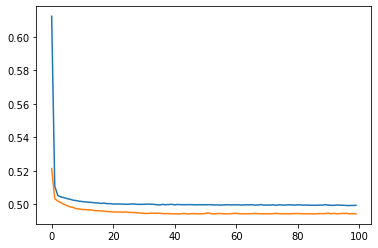

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

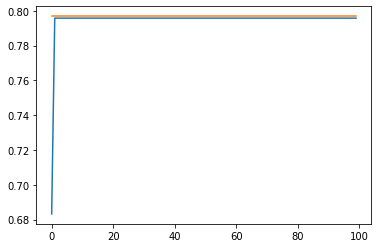

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])